<a href="https://colab.research.google.com/github/YoonSungLee/Statistical-Computing/blob/master/comStat3(Ch15_Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'><div style="text-align: center">Ch 15. Statistics in Python </font>

### <font color='blue'> The pandas data-frame </font>

* 넘파이는 다차원 변수를 배열형태로 저장하고 효과적으로 다룰 수 있다.
* 판다스는 엑셀형태의 쉬트와 같이 통계자료를 저장하는 라이브러리다.
* 이 세상의 대부분의 자료는 엑셀 쉬트처럼 생겼는데 행렬 원소로 보는 것보다 기존 통계소프트웨어처럼 처리하는 방식이다.
* 통계처리는 대부분 판다스로 끝난다. 하지만, 판다스로 처리가 힘든 것은 넘파이나 기존 파이썬 언어의 도움을 받아 처리가 가능하다.
* 판다스는 Series객체의 집합으로 이루어져 있어 DataFrame <-> Series <-> numpy <-> List 로 자유자재로 형을 변환할 수 있다.
* 데이터프레임은 시리즈의 모음

### <font color='blue'> 리스트로 데이터프레임 만들기 </font>  

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 아래는 이미 알고 있는 리스트다. 
nameList = ['John', 'Matt', 'Sara', 'Jim', 'Ashley']
ids = [ 23, 34, 83, 86, 12]
balance = [10.2, 84.3, 72.9, 27.1, 223.1]

# 아래는 위의 리스트를 딕셔너리로 묶어 데이터프레임으로 변환하는 예다.

dic = {'ids': ids, 'names': nameList, 'bal':balance}

users = pd.DataFrame(dic) # 시리즈는 하나의 열과 index를 묶어서 정의한다.
print (users)

   ids   names    bal
0   23    John   10.2
1   34    Matt   84.3
2   83    Sara   72.9
3   86     Jim   27.1
4   12  Ashley  223.1


In [0]:
# 데이터프레임에서 시리즈만 추출하는 예제임
# 하나의 열 + index

print(users['ids'])
print(users.ids)


0    23
1    34
2    83
3    86
4    12
Name: ids, dtype: int64
0    23
1    34
2    83
3    86
4    12
Name: ids, dtype: int64


In [0]:
# 시리즈를 생성할 수도 있다.

s = pd.Series([10,20,30,40,50], index=[0,1,2,3,4])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [0]:
# 시리즈를 데이터 프레임에 추가해 보자.
users['s'] = s
users

,ids,names,bal,s
0,23,John,10.2,10
1,34,Matt,84.3,20
2,83,Sara,72.9,30
3,86,Jim,27.1,40
4,12,Ashley,223.1,50


In [0]:
# 레코드를 추가해 보자.
users.index = users.index + 1  # shifting index
users.loc[6] = [13, 'Paul', 24.7, 60]  # adding a row
users = users.sort_index()  # sorting by index
users

,ids,names,bal,s
1,23,John,10.2,10
2,34,Matt,84.3,20
3,83,Sara,72.9,30
4,86,Jim,27.1,40
5,12,Ashley,223.1,50
6,13,Paul,24.7,60


### <font color='blue'> CSV 파일로 데이터프레임 만들기 </font>  

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
data =pd.read_csv('/gdrive/My Drive/전산통계/data/brain_size.csv', sep=';', na_values=".")
data
# Full-Scale IQ (FSIQ) score, Verbal IQ (VIQ), Performance IQ (PIQ) and Brain Size(MRI_Count).
# MRI_Count가 크면 뇌 용량이 크다고 추론할 수 있다.

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [0]:
data.shape

(40, 8)

In [0]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [0]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [0]:
print(data[data['Gender'] == 'Female']['VIQ'].mean()) # 여성의 VIQ 평균
print(data[data['Gender'] == 'Male']['VIQ'].mean()) # 남성의 VIQ 평균

109.45
115.25


In [0]:
groupby_gender = data.groupby('Gender') # pandas object
groupby_gender.mean()

# FSIQ: Full Scale IQ, VIQ: Verbal IQ, PIQ: Performance IQ, MRI_Count: 사진의 뇌 부분 픽셀 수

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [0]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [0]:
res = data['VIQ'].groupby(data['Gender']).mean()

In [0]:
res

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [0]:
res.index[0], res.values[0]

('Female', 109.45)

## 히스토그램
* 히스토그램 : 분포 모양을 추정
* 이산형의 하나의 x값에 대한 y축은 빈도를 의미하지만, 연속형의 하나의 x값에 대한 y축은 의미가 없다. x를 구간으로 설정해야 비율(넓이)이라는 의미를 갖는다.
* 히스토그램의 x축 구간을 어떻게 나누냐에 따라 그래프의 모양이 달라진다.

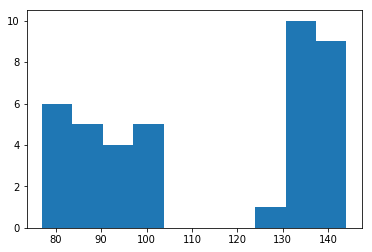

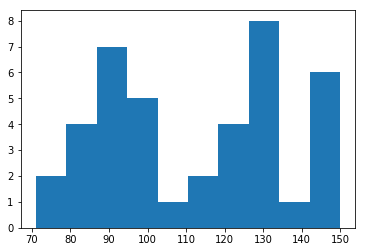

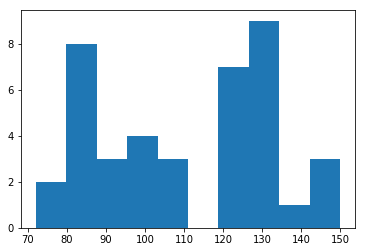

In [0]:
plt.hist(data['FSIQ'])
plt.show()
plt.hist(data['VIQ'])
plt.show()
plt.hist(data['PIQ'])
plt.show()




## boxplot<br><br>

![대체 텍스트](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)
![대체 텍스트](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

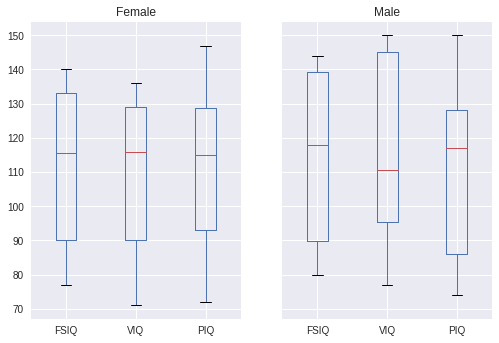

In [0]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

남녀의 VIQ를 비교해보았을때, VIQ가 꽤나 높은 몇 명의 남자가 존재하지만 평균적으로는 여자의 VIQ가 더 높다고 할 수 있다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1773cdd630>,
      dtype=object)

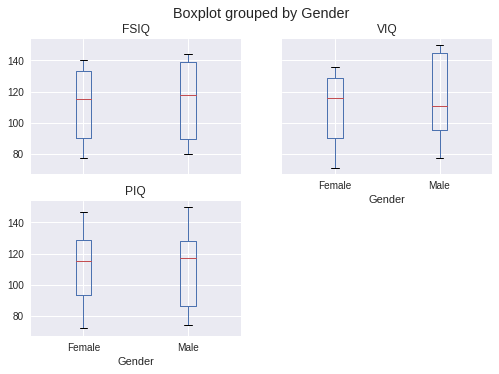

In [0]:
data.boxplot(column=['FSIQ','VIQ','PIQ'],by='Gender')

#### Exercise 
* VIQ의 평균은 얼마인가?
* 이 연구에 포함된 남녀의 숫자는 얼마인가?
* 남녀의 MRI counts의 평균을 로그단위로 구하시오.

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

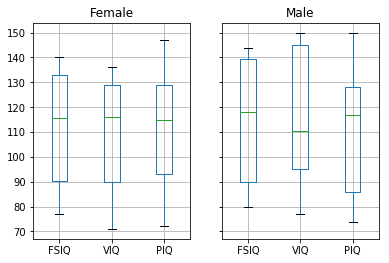

In [0]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

In [0]:
data['VIQ'].mean()

112.35

In [0]:
data['Gender'].value_counts()

Female    20
Male      20
Name: Gender, dtype: int64

In [0]:
data['log_MRI_Count'] = np.log(data['MRI_Count'])
data['log_MRI_Count'].groupby(data['Gender']).mean()

Gender
Female    13.665830
Male      13.767731
Name: log_MRI_Count, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0cf8ba20>,
      dtype=object)

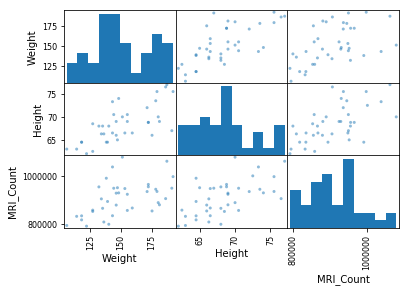

In [0]:
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0cf8b438>,
      dtype=object)

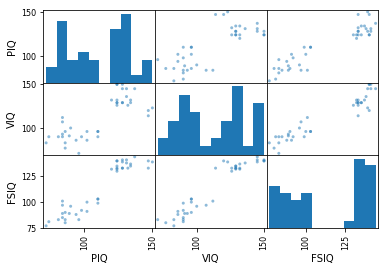

In [0]:
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

#### Exercise 

남자와 여자로 구분하여 위의 산점행렬을 구하시오.

In [0]:
data[data.Gender == 'Male']

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,log_MRI_Count
1,2,Male,140,150,124,NaN,72.5,1001121,13.816631
2,3,Male,139,123,150,143.0,73.3,1038437,13.853227
3,4,Male,133,129,128,172.0,68.8,965353,13.780249
8,9,Male,89,93,84,134.0,66.3,904858,13.715533
9,10,Male,133,114,147,172.0,68.8,955466,13.769954
11,12,Male,141,150,128,151.0,70.0,1079549,13.892054
12,13,Male,135,129,124,155.0,69.0,924059,13.736531
17,18,Male,100,96,102,178.0,73.5,945088,13.759033
19,20,Male,80,77,86,180.0,70.0,889083,13.697946
20,21,Male,83,83,86,NaN,NaN,892420,13.701692


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0cd01470>,
      dtype=object)

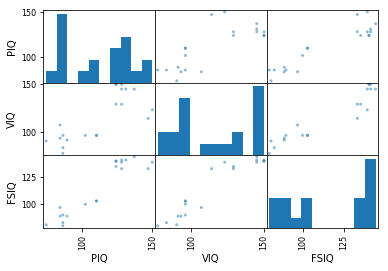

In [0]:
pd.plotting.scatter_matrix(data[data.Gender == 'Male'][['PIQ', 'VIQ', 'FSIQ']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0c99a6a0>,
      dtype=object)

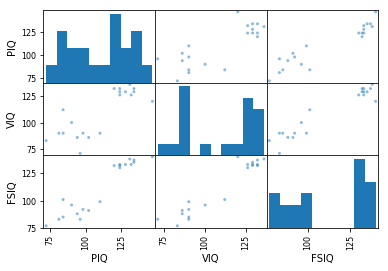

In [0]:
pd.plotting.scatter_matrix(data[data.Gender == 'Female'][['PIQ', 'VIQ', 'FSIQ']])

## ~9.30

### 표본평균의 평균
![대체 텍스트](https://i.imgur.com/8Z1ET9q.png)

### 표본평균의 분산
![대체 텍스트](https://i.imgur.com/2ntsMnz.png)

### <font color='blue'> t-Test </font>

공장에서 sensor(n = 10, u = 80, sigma = 5일때)에 x1,x2,x3,...,xn가 관측되었다.  
xi가 대강 80을 중심으로 움직인다고 알고 있다(In Control).  
x_bar = 100이 관측되었다.  
이 상황은 In Control인가? Out of Control인가?  
이것을 파악하기 위해서 t-Test를 이용한다.


[출처](https://datascienceschool.net/view-notebook/14bde0cc05514b2cae2088805ef9ed52/)

![대체 텍스트](https://i.imgur.com/Nzwmk2u.png)
![대체 텍스트](https://i.imgur.com/S0uQoIz.png)
![대체 텍스트](https://i.imgur.com/FZVRFDE.png)
![대체 텍스트](https://i.imgur.com/z86kwWx.png)
![대체 텍스트](https://i.imgur.com/D0uCaTy.png)
![대체 텍스트](https://i.imgur.com/zr2lDNo.png)
![대체 텍스트](https://i.imgur.com/gCrAaib.png)
![대체 텍스트](https://i.imgur.com/d1tMy9F.png)
![대체 텍스트](https://i.imgur.com/cqEP2bP.png)
![대체 텍스트](https://i.imgur.com/gJZcMrX.png)
![대체 텍스트](https://i.imgur.com/vqBeAxy.png)


### Note
t-test는 비교하려는 두 집단이 정규분포를 따르지 않아도 된다.<br>
검정통계량이 X_bar - Y_bar와 같이 표본의 평균이기 때문에, 중심극한정리에 의하여 이 값들은 정규분포를 따르게 된다. 따라서 검정통계량을 정규분포 그래프에 매핑함으로써 기각역 설정, p-value등을 이용할 수 있다.

$ t = \frac {\bar x - \mu}{s / \sqrt n} $ 이고 p-value는 $ Pr(|T| > t) $ 임


In [0]:
# 단일표본 t검정
# data['VIQ'].mean() == 112.35
# data['VIQ'].sqrt() == 23.61

from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)  # t = (112.35 - 0)/(23.61/(np.sqrt(40)))

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [0]:
import numpy as np
(112.35 - 0)/(23.61/(np.sqrt(40)))
# (data['VIQ'].mean() - 0) / data['VIQ'].std() * np.sqrt(40)

30.09588268699004

In [0]:
# 단일표본 t검정
from scipy import stats
stats.ttest_1samp(data['VIQ'], 110) # pvalue의 기준 : 0.1 or 0.05

# pvalue가 0.1보다 크면 in control
# pvalue가 0.1보다 작으면 out of control

Ttest_1sampResult(statistic=0.6293461053092635, pvalue=0.5327920500038907)

X-ray의 사진 pixel을 통해 암의 유무를 판단하는 상황에서, t-Test를 통해 유의미한 pixel을 추출해 낼 수 있다.

$$ t = \frac {\bar x_1 - \bar x_2 }{s_p \sqrt{\frac {1}{n_1}+\frac {1}{n_2}}}, s^2_p = \frac{(n_1-1)S^2_1+(n_2-1)S^2_2} {n_1+n_2-2}$$

In [0]:
# 독립표본 t검정(independant)
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq) # 독립표본

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [0]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) # 대응표본
# 계산은 되지만, 잘못 적용한 것

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [0]:
# 대응표본 t검정 
# before 데이터 또는 after 데이터 모두가 존재해야 한다. 하나라도 존재하지 않는다면 레코드 전체를 제거한다.
# 이렇게 적용해야 함
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

#### Exercise 
* 남녀간의 VIQ 차이가 있다고 주장할 수 있는가?

##### Conclusion: 
답은 남녀간의 VIQ 차이가 있다고 주장할만한 충분한 근거가 존재하지 않는다 임

![대체 텍스트](https://i.imgur.com/twgz8XW.jpg)

### ~10.16

### <font color='blue'> Linear Models </font>

주어진 두 자료 쌍을 각각 x와 y 라고 하자.
이때, x가 변화할 때, y가 선형적으로 변환한다고 가정하면 
$$ y = \alpha + \beta x + \epsilon $$

여기서, $\epsilon$는 랜덤한 노이즈를 나타낸다. 


In [0]:
import numpy as np
import pandas as pd
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [0]:
np.array(data['x']).reshape(-1,1)

array([[-5.        ],
       [-4.47368421],
       [-3.94736842],
       [-3.42105263],
       [-2.89473684],
       [-2.36842105],
       [-1.84210526],
       [-1.31578947],
       [-0.78947368],
       [-0.26315789],
       [ 0.26315789],
       [ 0.78947368],
       [ 1.31578947],
       [ 1.84210526],
       [ 2.36842105],
       [ 2.89473684],
       [ 3.42105263],
       [ 3.94736842],
       [ 4.47368421],
       [ 5.        ]])

In [0]:
np.array(data['y']).reshape(-1,1)

array([[-13.50261855],
       [-20.86807829],
       [-18.95479227],
       [-19.55503238],
       [-10.22258001],
       [-21.31141795],
       [ -3.54706873],
       [-11.99219602],
       [ -6.09226467],
       [ -6.78695519],
       [  1.63790543],
       [-10.87214179],
       [ -2.3423004 ],
       [ -1.00990163],
       [  6.64034093],
       [ -0.71535454],
       [  4.57344506],
       [  3.33067159],
       [  8.58990762],
       [ 12.33126085]])

In [0]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit() # ordinary least square
print(model.summary())

# coef : alpha, beta
# std err : alpha와 beta의 분산(값이 크면 신뢰성이 떨어진다)
# P>[t] : intercept와 x가 0일 확률
# t = coef/std err
# R-squared(설명력) : 0 <= R**2(= SSR/SST) <= 1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           8.56e-08
Time:                        09:46:29   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [0]:
# normal equation

n = len(x)
summ1 = 0
summ2 = 0
xbar = np.mean(x)
ybar = np.mean(y)

for i in range(n):
    summ1 += (x[i] - xbar)**2
    summ2 += (x[i] - xbar)*(y[i] - ybar)
    
beta = summ2/summ1
alpha = ybar - beta*xbar

print(alpha, beta)

-5.533458545842919 2.9368883155440497


### ~10.21

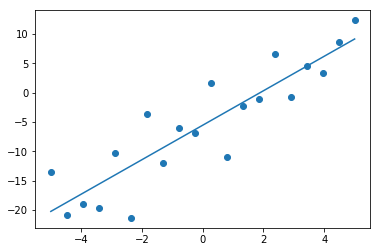

In [0]:
import matplotlib.pyplot as plt
pred = model.predict(data['x'])
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], pred)
plt.show()

In [0]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

data = pd.read_csv('/gdrive/My Drive/전산통계/data/iris.csv')

new_data = data[data['name']=='versicolor']

In [0]:
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,name
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.99
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.30e-05
Time:                        08:30:37   Log-Likelihood:                -3.0629
No. Observations:                  50   AIC:                             10.13
Df Residuals:                      48   BIC:                             13.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1755      0.342      3.436   

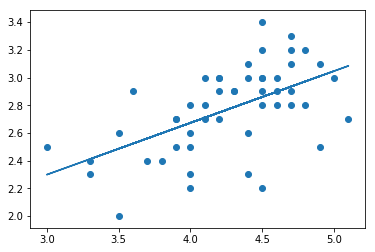

In [0]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

data = pd.read_csv('/gdrive/My Drive/전산통계/data/iris.csv')

new_data = data[data['name']=='versicolor']

model = ols(" sepal_width ~ petal_length", new_data).fit()
print(model.summary())

pred = model.predict(new_data['petal_length'])

plt.scatter(new_data['petal_length'], new_data['sepal_width'])
plt.plot(new_data['petal_length'], pred)
plt.show()

In [0]:
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.58e-20
Time:                        14:53:34   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

$$ \hat Y = 2.98 \  - \ 1.48 \ I_{versicolor} \ - \ 1.663 \ I_{virginica} + \  0.298 \ petal\ Length$$

<font color='red'> H.W #6: 남녀 VIQ 비교 </font></br>
뇌 크기, 키, 몸무게 차이를 배제하고 남자와 여자의 VIQ의 차이를 비교해 보시오.  


### ~ 중간고사

* 관심 : 보험사기여부(categorical)
* 영향을 주는 변수 : 소득(양적 변수), 지역, 직업 등

### <font color='blue'> Chi-Square Test </font>

* 두 개의 categorical 데이터의 독립여부를 검정하는 방법론
$$ \chi^2  = \sum_{i=1}^r \sum_{j=1}^c \frac {(O_{ij} - E_{ij})^2}{E_{ij}} \sim \chi^2(r-1)(c-1) \text{ }under \text{ } H_0, H_0: 두 \text{ }변수는 \text{ }독립이다. $$<br>
자유도는 (r-1)*(c-1)

![대체 텍스트](https://i.imgur.com/Xwv9be3.jpg)

In [0]:
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/전산통계/data/inactive.csv", index_col=0, dtype={'sex': str})
data.head()

# target : 관심의 대상

,id,sex,age,ageGrp,count,main_shop,target
0,b949e0b4fafabfdb51f42213e38976a5e9ab16fc26cc9c...,2,53,4555,20,AC,0
1,a53d9c19cd9a865f6ba617e06f917da1450721fbc68a1f...,2,46,4555,8,AD,0
2,17cc17f5f9eece76a65602468aa403e1941979e683ecff...,2,42,3545,110,CC,0
3,ad8440490d1a576e6d9e0413232c2aa48811bcc32f1ceb...,2,49,4555,272,AB,0
4,9e1aeea40314976b8cc4b1250a7a0a3c0634e79078a383...,1,44,3545,276,AB,0


In [0]:
data['sex'] = data['sex'].astype(str)
data.drop(columns=['age'], inplace=True)
data.head()

,id,sex,ageGrp,count,main_shop,target
0,b949e0b4fafabfdb51f42213e38976a5e9ab16fc26cc9c...,2,4555,20,AC,0
1,a53d9c19cd9a865f6ba617e06f917da1450721fbc68a1f...,2,4555,8,AD,0
2,17cc17f5f9eece76a65602468aa403e1941979e683ecff...,2,3545,110,CC,0
3,ad8440490d1a576e6d9e0413232c2aa48811bcc32f1ceb...,2,4555,272,AB,0
4,9e1aeea40314976b8cc4b1250a7a0a3c0634e79078a383...,1,3545,276,AB,0


In [0]:
#  Observed data

pd.crosstab(data['target'], data['sex'])


sex,1,2,nan
target,,,
0,24468,37710,216
1,13808,23404,147


In [0]:
pd.crosstab(data['target'], data['sex'],normalize='index')

sex,1,2,nan
target,,,
0,0.392153,0.604385,0.003462
1,0.369603,0.626462,0.003935


In [0]:
data = data[data['sex'] != 'nan']

In [0]:
data['sex'].value_counts()

2    61114
1    38276
Name: sex, dtype: int64

In [0]:
class Chisq:
    def __init__(self,observed):
        from scipy import stats
        self.observed = observed
        self.expected = stats.contingency.expected_freq(observed)
    
    def chi2(self):
        import numpy as np
        chi2 = np.sum(((self.observed - self.expected)**2/self.expected))
        df = (self.observed.shape[0]-1) * (self.observed.shape[1]-1)
        p_value = 1.0 - stats.chi2.cdf(chi2 , df)
        n_score = np.sqrt(2*chi2) - np.sqrt(2*df-1)
        return chi2, df, p_value, n_score

Question) n_score?<br>
n_score는 chi-square 분포의 가시성이 어렵기 때문에(자유도에 따라 그래프가 바뀐다) 표준정규분포로 바꿔서 판단하는 방법이다.<br>
Y가 자유도 r인 chi-square분포를 따른다고 하면(E(Y)=r, V(Y) = 2r), Z = np.sqrt(2Y) - np.sqrt(2(r-1))은 대략 표준정규분포를 따른다고 할 수 있다.

In [0]:
from scipy import stats
import numpy as np
chiStat = Chisq(np.array(pd.crosstab(data['target'], data['sex'])))
# (chi2, df, p_value, n_score) 순으로 출력된다. p_value가 작을수록, n_score가 클수록 중요한 변수다.
# Chisq는 입력변수 2개가 모두 질적변수여야 한다.
print(chiStat.chi2()) # chi2, df, p_value, n_score

(49.55832417074454, 1, 1.9255708139098715e-12, 8.955734445106955)


In [0]:
chiStat = Chisq(np.array(pd.crosstab(data['target'], data['ageGrp'])))
print(chiStat.chi2())

(306.1688438724315, 5, 0.0, 21.745457921502748)


### <font color='blue'> <div style="text-align: center">End of Chapter </font>  